In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [6]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

df['cum_sum'] = df['test_cumsum_annualized_return'].cumsum()
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["future_candles"] != 5]
# df = df[df["n_clusters"] != 150]
# df = df[df["n_clusters"] != 200]
# df = df[df["log_return_threshold"] <= 0.01]
# df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,val_sum_annualized_return,val_sum_max_drawdown,val_avg_calmar_ratio,test_sum_annualized_return,test_sum_max_drawdown,test_avg_calmar_ratio,train_cumsum_annualized_return,val_cumsum_annualized_return,test_cumsum_annualized_return,train_size,test_size,random_state,cum_sum
0,5,0.078426,0.050579,0.007155,7.068793,0.021508,0.016799,1.280314,0.078426,0.050579,0.021508,24000,1920,168,0.021508
1,18,0.122250,0.065495,0.003494,18.745977,-0.026209,0.053871,-0.486514,0.200677,0.116074,-0.004701,24000,1920,168,0.016808
2,19,0.180403,0.029629,0.006832,4.336635,0.036876,0.020112,1.833578,0.381080,0.145703,0.032176,24000,1920,168,0.048983
3,53,0.088594,0.027370,0.022200,1.232870,-0.072232,0.081892,-0.882045,0.469673,0.173073,-0.040056,24000,1920,168,0.008927
4,55,0.142203,0.037444,0.006301,5.942456,0.051262,0.024073,2.129482,0.611876,0.210516,0.011206,24000,1920,168,0.020132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,6,0.109669,0.022340,0.019046,1.172941,-0.035871,0.040141,-0.893618,0.176434,0.028157,-0.019060,24000,1920,108,-12.170414
1460,38,0.064550,0.052272,0.014496,3.605929,-0.008378,0.019359,-0.432786,0.240983,0.080428,-0.027438,24000,1920,108,-12.197852
1461,41,0.092509,0.006236,0.007029,0.887220,0.026488,0.016194,1.635608,0.333492,0.086664,-0.000951,24000,1920,108,-12.198803
1462,65,0.048557,0.013198,0.006438,2.050157,-0.012684,0.013684,-0.926922,0.382050,0.099863,-0.013634,24000,1920,108,-12.212437


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


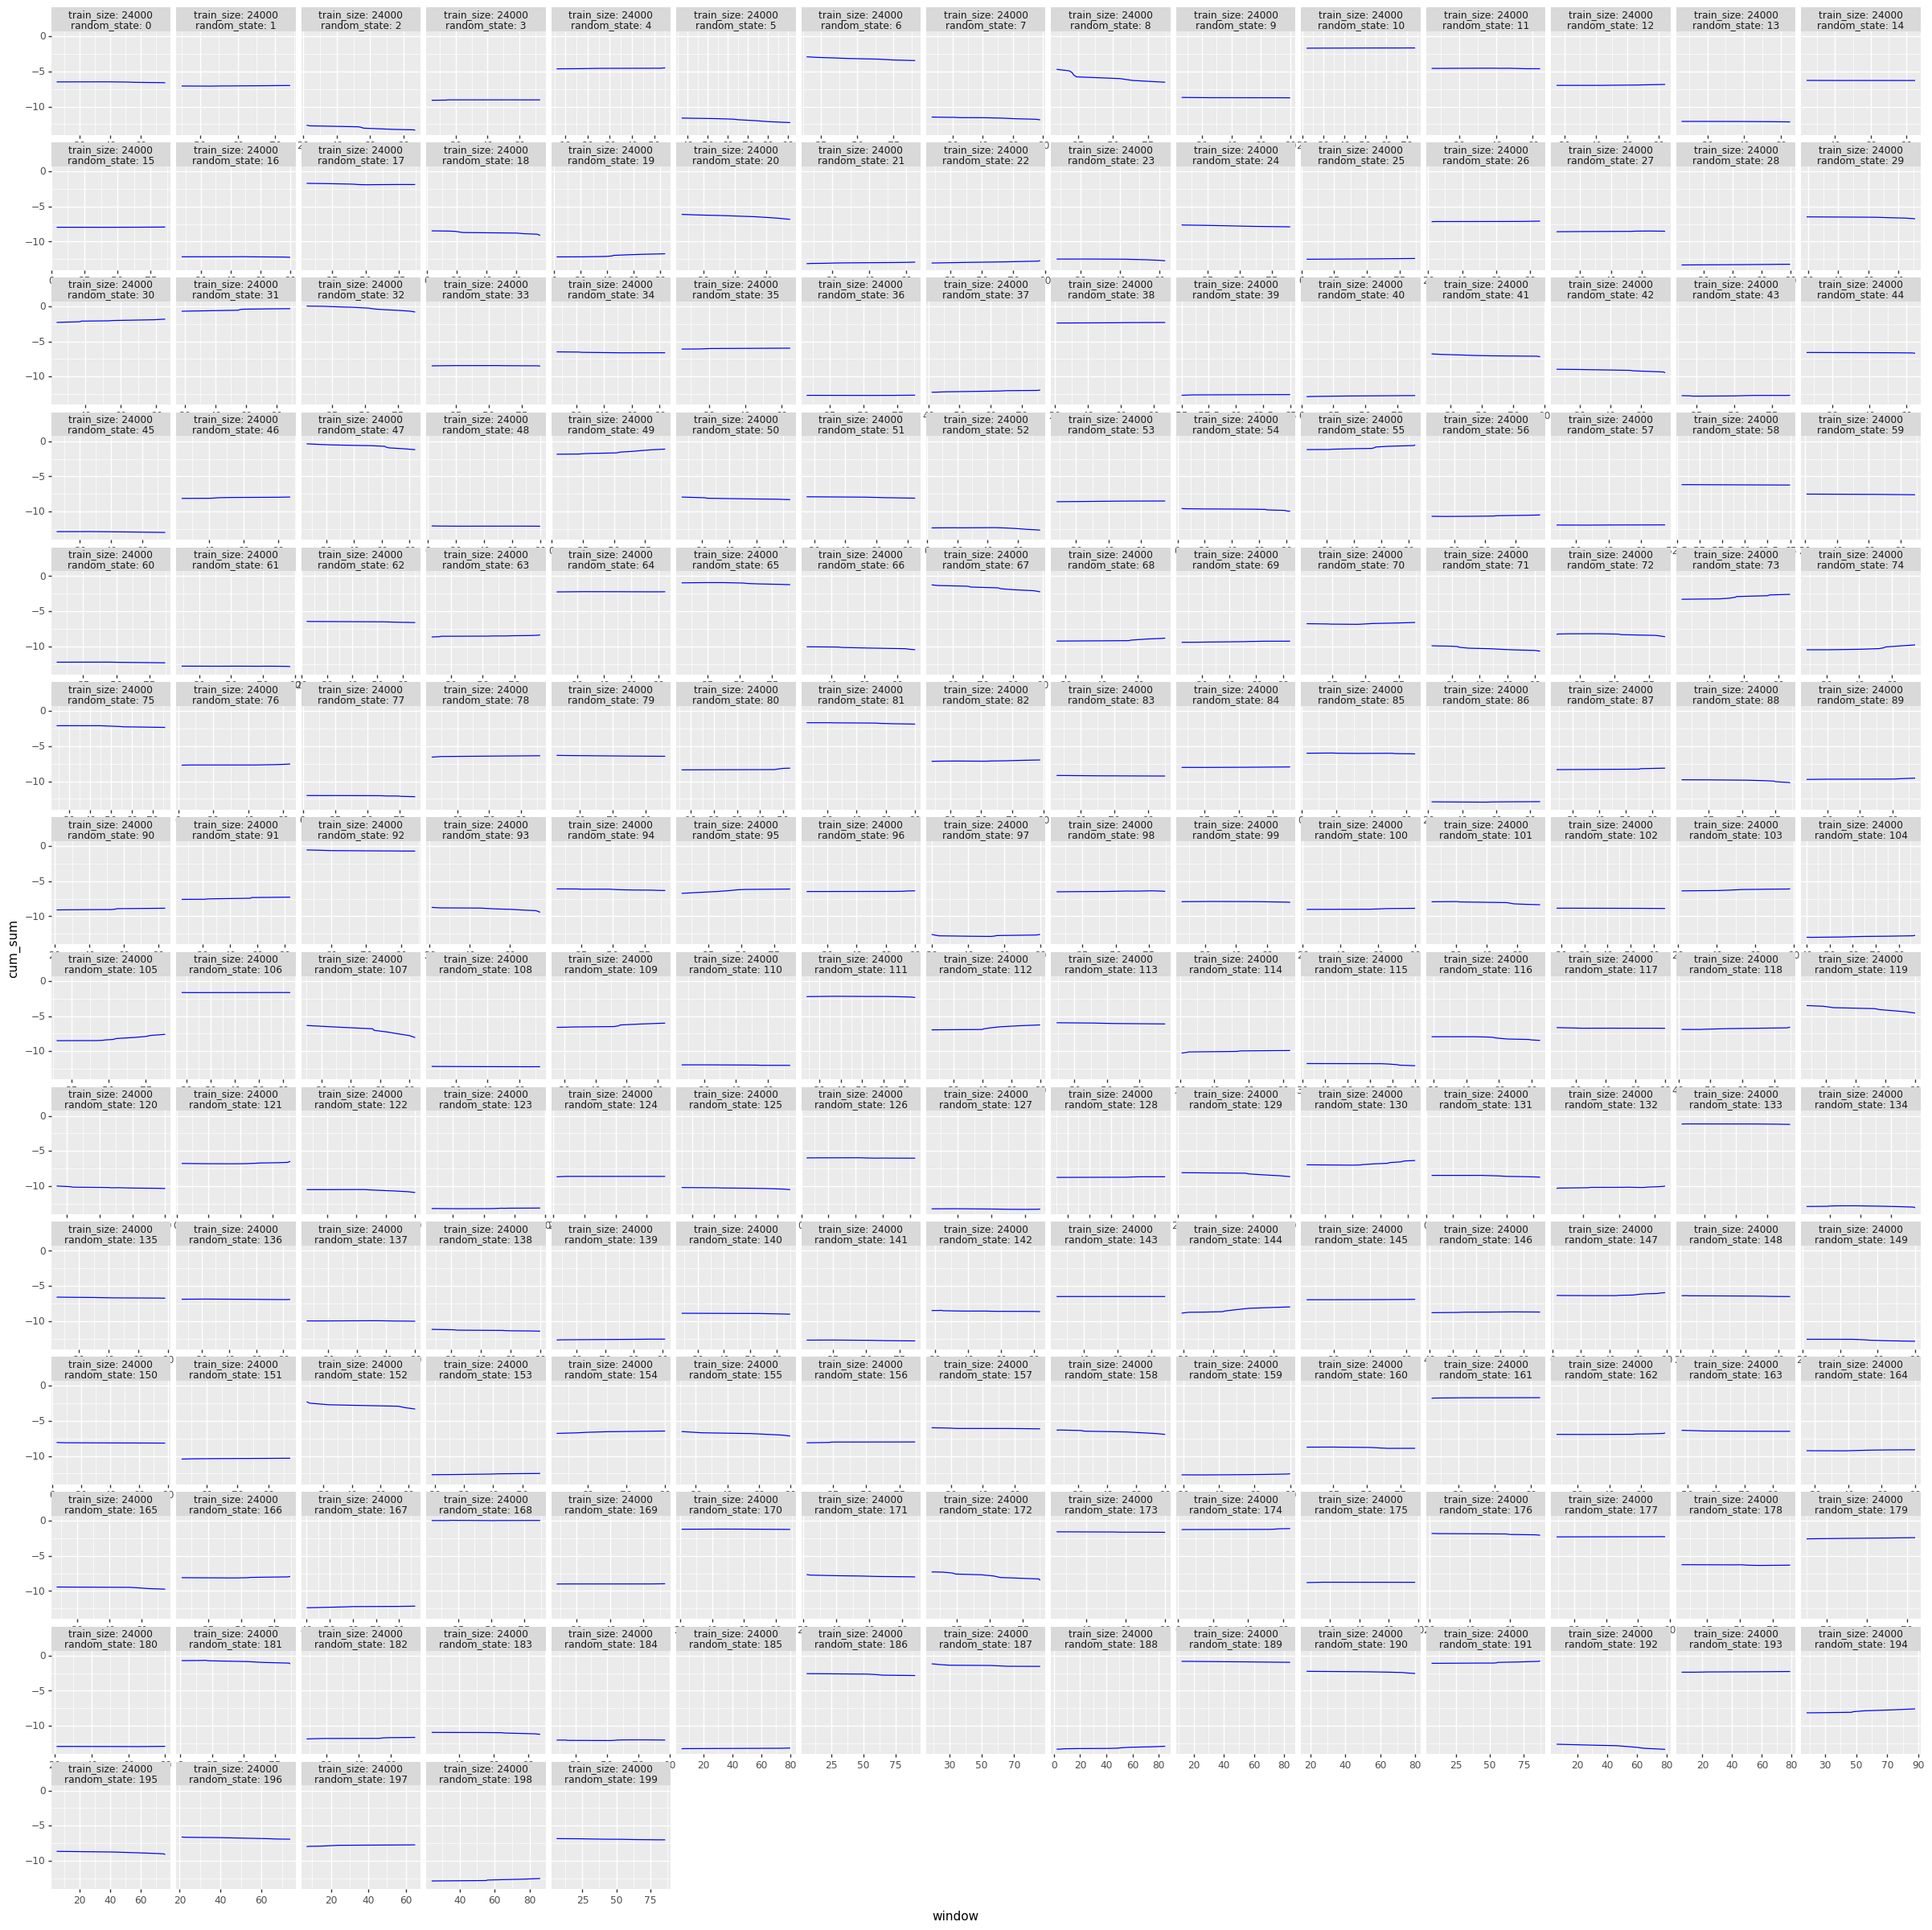

In [7]:
p = ggplot(df)
p = p + geom_line(aes(x="window", y="cum_sum"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(30, 30))
print(p)

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


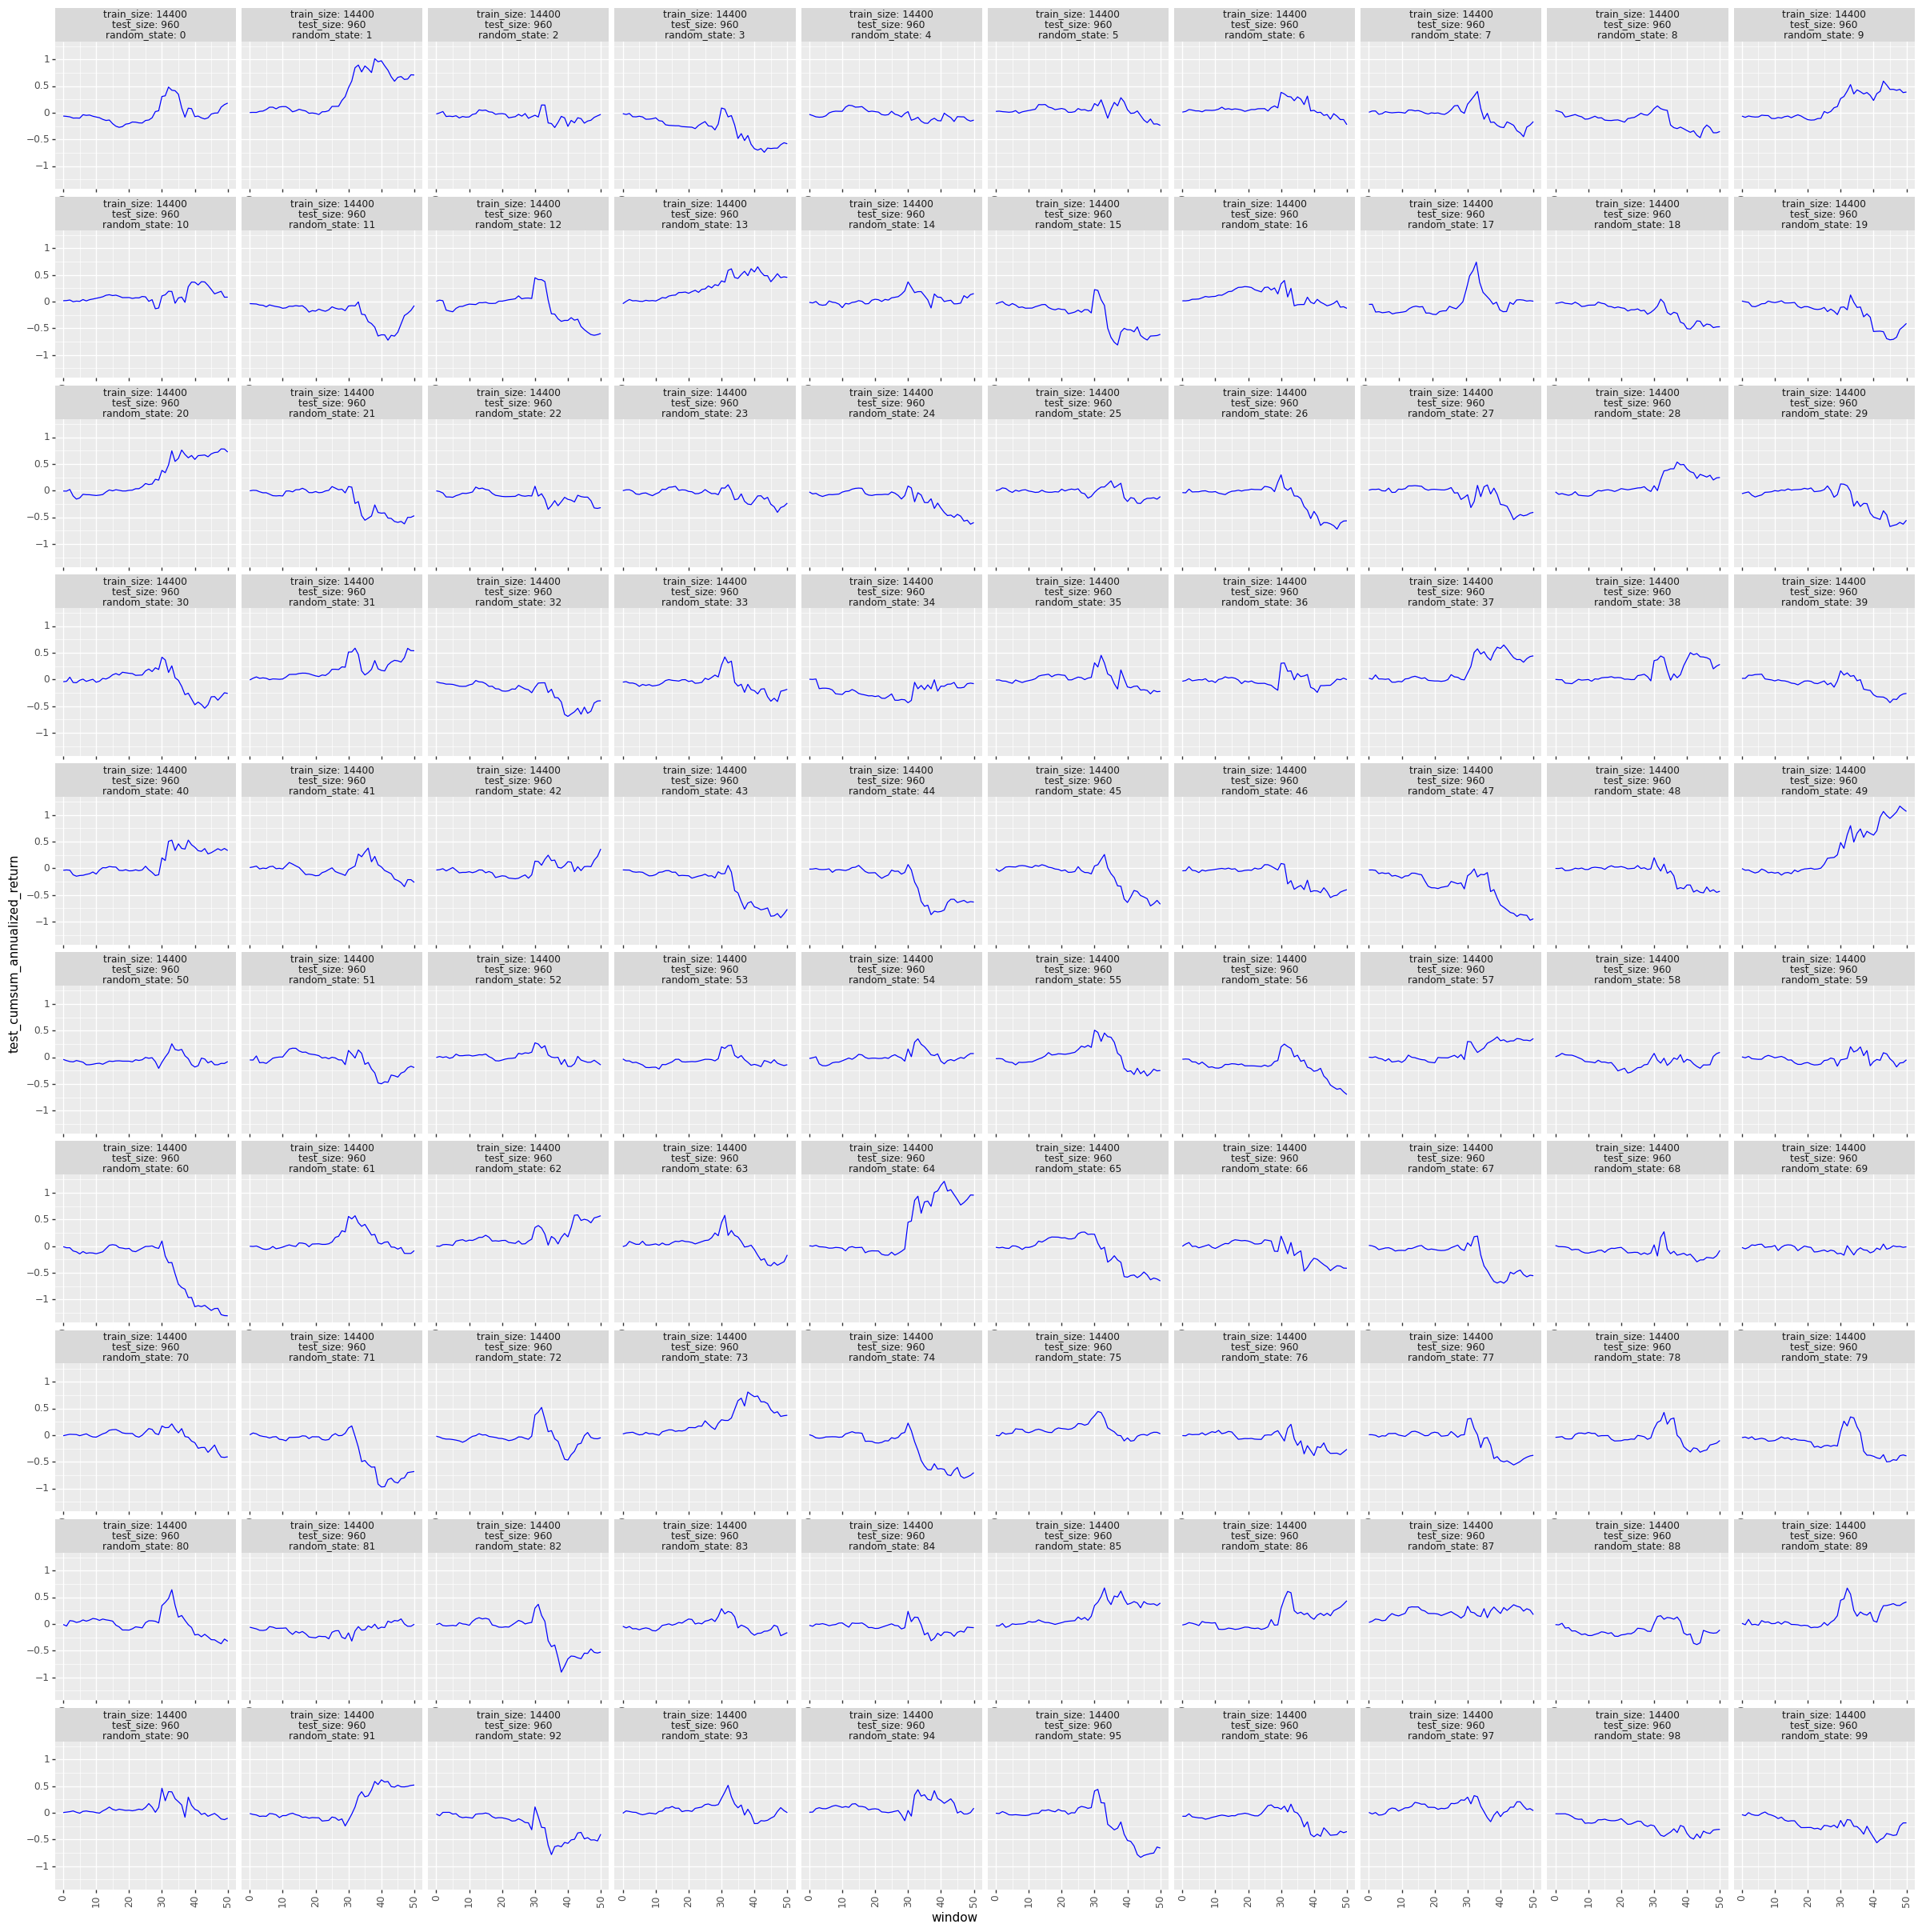

In [44]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)